In [41]:
from sklearn import tree
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [42]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:70% !important}</style>"
HTML(style)

In [43]:
titainc_data = pd.read_csv('train.csv')

In [44]:
titainc_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
# Анализирует, какие переменные будем учитывать при обучении
titainc_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
X = titainc_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [47]:
y = titainc_data.Survived

In [48]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [49]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [50]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [51]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

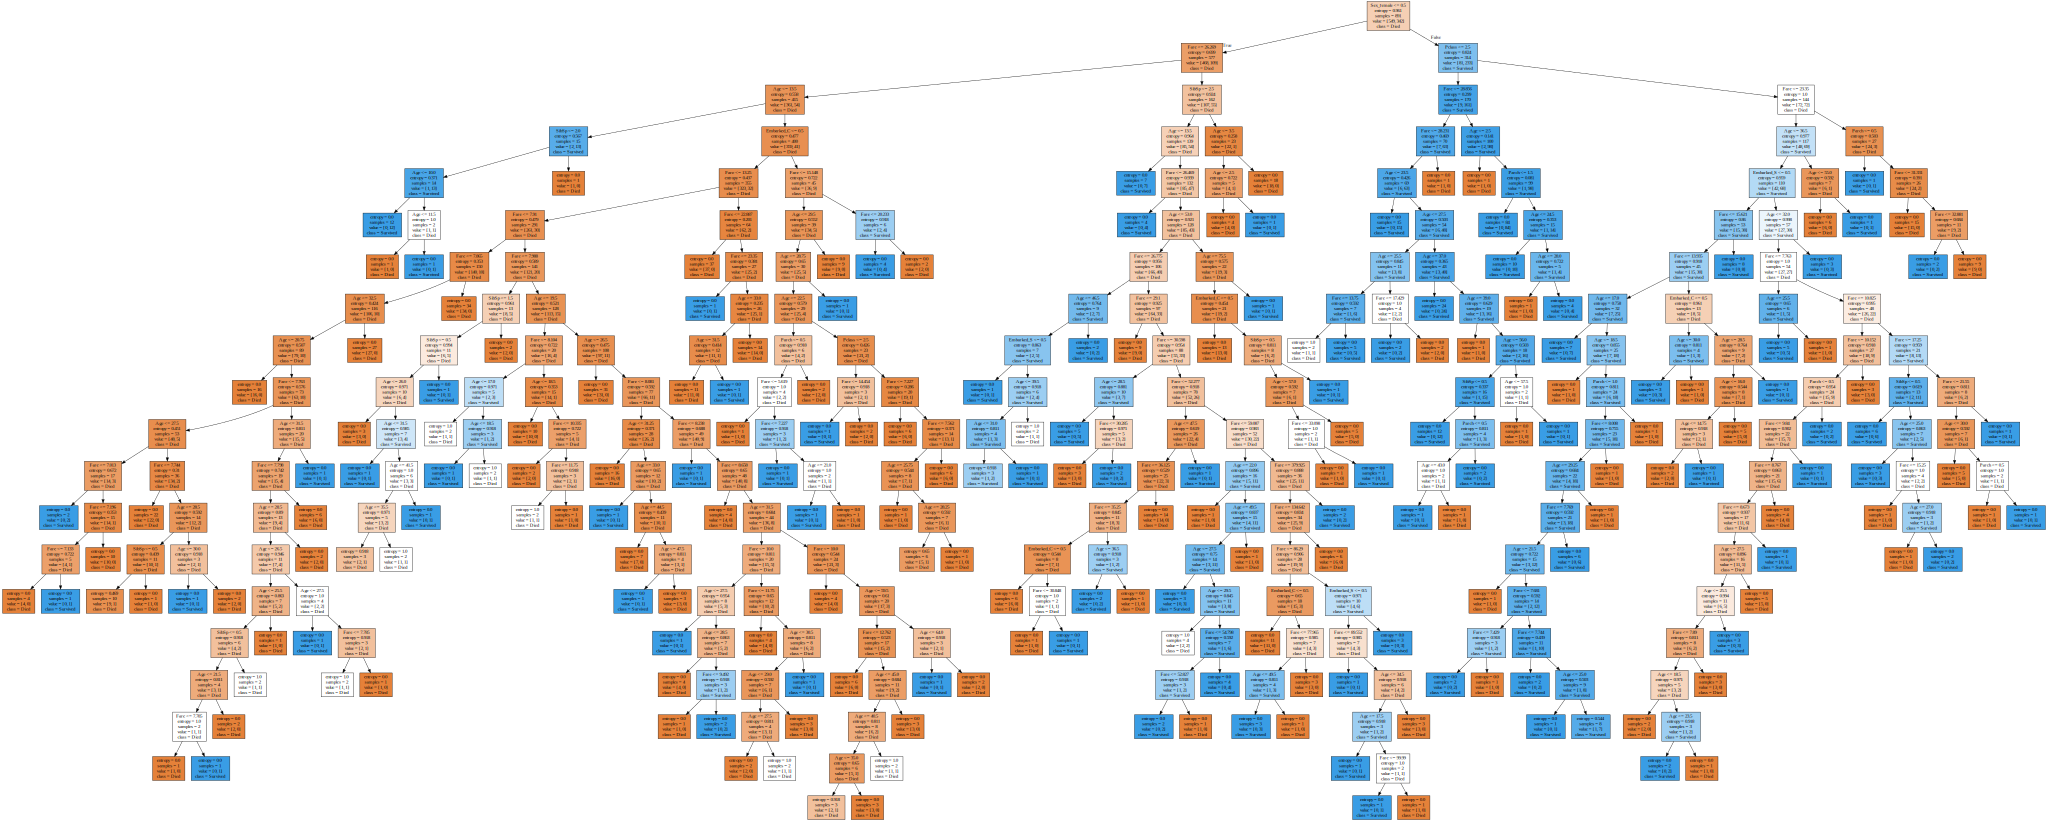

In [52]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died','Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [53]:
# Нормальное обучение
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
clf.score(X, y)

0.9135802469135802

In [57]:
clf.score(X_train, y_train)

0.9798657718120806

In [58]:
# Мы переобучили дерево
clf.score(X_test, y_test)

0.7796610169491526

In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [60]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [61]:
clf.score(X_train, y_train)
# Классификатор хуже работает на трейне

0.8406040268456376

In [62]:
clf.score(X_test, y_test)
# Но лучше на тесте

0.8067796610169492

In [63]:
max_depth_values = range(1, 100)

In [64]:
scores_data = pd.DataFrame()

In [76]:
from sklearn.model_selection import cross_val_score

In [65]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score], 'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [66]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073
...,...,...,...,...
0,95,0.979866,0.766102,0.770182
0,96,0.979866,0.769492,0.765140
0,97,0.979866,0.766102,0.766835
0,98,0.979866,0.766102,0.765154


In [73]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars =['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name = 'score')

In [86]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.765140
294,97,cross_val_score,0.766835
295,98,cross_val_score,0.765154


<AxesSubplot:xlabel='max_depth', ylabel='score'>

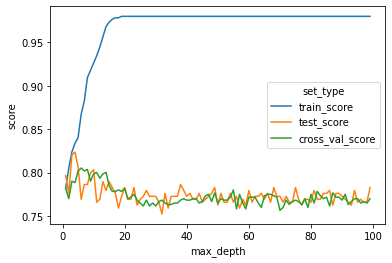

In [75]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
# График, объясняющий все

In [77]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [78]:
cross_val_score(clf, X_train, y_train, cv=5).mean()
# cross_val_score более устойчив к переобучению

0.7886274509803922

In [94]:
max_score = scores_data_long.query(("set_type == 'cross_val_score'")).score.max()

In [95]:
scores_data_long.query("score == @max_score")
# Нашли самый крутой depth

,max_depth,set_type,score
203,6,cross_val_score,0.805434


In [96]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [97]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8271186440677966